<center> <a href="https://github.com/CyConProject?tab=repositories">
  <img src="https://github.com/CyConProject/Lab/blob/main/Figures/CyCon.png?raw=true" alt="logo" width="80" >
</a>
 </center>

# Polynomial Regression

In this lab, we will delve into the concept of polynomial regression and its application in data analysis. Polynomial regression is a statistical technique that allows us to model the relationship between a dependent variable and  independent variables using polynomial functions. By understanding polynomial regression, we can effectively analyze and predict complex relationships between variables.

### Objectives:

After completing this lab, you will be able to:

- Understand the concept of polynomial regression and its advantages over linear regression.
- Implement polynomial regression using scikit-learn.
- Build a polynomial regression model with a single independent variable.
- Extend polynomial regression to multiple independent variables.
- Train the polynomial regression model on a dataset.
- Evaluate the performance of the polynomial regression model using evaluation metrics such as mean squared error (MSE) and coefficient of determination (R-squared).

By mastering these concepts and techniques, you will gain valuable skills in implementing and utilizing polynomial regression models for data analysis and prediction. This knowledge can be applied in various domains such as finance, economics, and engineering, where complex relationships between variables need to be modeled accurately.

### Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load the construction dataset

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/CyConProject/Lab/main/Datasets/Concrete_Data.csv'
df = pd.read_csv(url)

### Step 3: Explore the dataset

In [3]:
# Display the first few rows of the dataset
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### `Concrete_Data.csv`:

The regression problem focuses on predicting the concrete compressive strength using its components as well as its age. The variables are listed in the same order as the numerical values in the database rows.

    Name -- Data Type -- Measurement -- Description
1.   **Cement** -- quantitative -- kg in a m3 mixture -- Input Variable
2.   **Blast Furnace Slag** -- quantitative -- kg in a m3 mixture -- Input Variable
3.   **Fly Ash** -- quantitative -- kg in a m3 mixture -- Input Variable
4.   **Water** -- quantitative -- kg in a m3 mixture -- Input Variable
5.   **Superplasticizer** -- quantitative -- kg in a m3 mixture -- Input Variable
6.   **Coarse Aggregate** -- quantitative -- kg in a m3 mixture -- Input Variable
7.   **Fine Aggregate** -- quantitative -- kg in a m3 mixture -- Input Variable
8.   **Age** -- quantitative -- Day (1~365) -- Input Variable
9.   **Concrete compressive strength** -- quantitative -- MPa -- Output Variable


[`Data source`](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

Now, let's visulalize Compressive Strength with respect to Water.

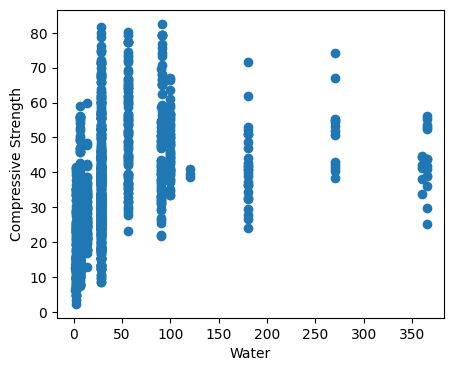

In [4]:
plt.figure(figsize=(5, 4))
plt.scatter(df.age, df.csMPa)
plt.xlabel("Water")
plt.ylabel("Compressive Strength")
plt.show()

### Step 4: Create train and test datasets
In this section, we first assign the input features to X and the target variable to y. Next, we split the data into train and test sets using train_test_split from sklearn.model_selection.

You can always adjust the test_size parameter as per your preference. In this code, we set `test_size=0.2`. Therefore, 20% of the data would be saved as the test dataset.

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into input features (X) and target variable (y)
X = df.drop('csMPa', axis=1)
y = df['csMPa']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Training the model

Today, we'll explore polynomial regression, an extension of linear regression used to model nonlinear relationships between variables. While linear regression assumes a straight-line relationship, polynomial regression fits a curve to the data points.

Polynomial regression uses a polynomial equation of this form:

$$ y = β₀ + β₁x + β₂x² + ... + βₙxⁿ $$


where 'y' is the dependent variable, 'x' is the independent variable, and β₀, β₁, β₂, ..., βₙ are the coefficients. The degree 'n' determines the complexity of the curve. We estimate the coefficients by minimizing the difference between predicted and actual values using least squares.

But, how can we fit our data into this equation when we only have the values of 'x'?

To accomplish this, we can utilize the `PolynomialFeatures()` function from the Scikit-learn library. This function allows us to generate **a new set of features** derived from the original feature set:
$$[1, x, x², ..., xⁿ]$$

In other words, it creates a matrix containing all possible polynomial combinations of the features, where the degree of each combination is **less than or equal to** the specified degree.

For instance, let's consider a scenario where the original feature set consists of two features: x₁ and x₂. If we choose a polynomial degree of 2, the `PolynomialFeatures()` function will generate 5 features:

$$[1, x₁, x₂, x₁², x₁x₂, x₂²]$$

Now, let's train a polynomial regression model as well as a simple linear regression model on `X_train[['age']]` and `y_train` data to see how this new model can change the game when data does not follow a linear trend.



First, let's train the polynomial regresion model.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
# Importing the PolynomialFeatures class from the sklearn.preprocessing module.
Polynomial = PolynomialFeatures(degree=4)

# Creating an instance of the PolynomialFeatures class with degree 4.
# This class generates polynomial features up to the specified degree.
X_train_Polynomial = Polynomial.fit_transform(X_train[['age']])

# Applying the fit_transform method of the PolynomialFeatures instance to the 'age' column of the X_train dataset.
# This method transforms the input feature matrix X_train[['age']] into a new matrix with polynomial features.
# The new matrix contains all polynomial combinations of the 'age' feature up to degree 4.
X_train_Polynomial

array([[1.00000e+00, 2.80000e+01, 7.84000e+02, 2.19520e+04, 6.14656e+05],
       [1.00000e+00, 2.80000e+01, 7.84000e+02, 2.19520e+04, 6.14656e+05],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01],
       ...,
       [1.00000e+00, 1.00000e+02, 1.00000e+04, 1.00000e+06, 1.00000e+08],
       [1.00000e+00, 2.80000e+01, 7.84000e+02, 2.19520e+04, 6.14656e+05],
       [1.00000e+00, 2.80000e+01, 7.84000e+02, 2.19520e+04, 6.14656e+05]])

The `fit_transform` method of the `PolynomialFeatures` instance is applied to the `'age'` column of the `X_train` dataset. This method transforms the input feature matrix into a new matrix containing all polynomial combinations of the 'age' feature **up to degree 4** (as we set it to be degree=4). The result is stored in the variable `X_train_Polynomial`, which will be used in the code for training our regression model.

Here is how the fit_transform method works:


$$
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{bmatrix}
\longrightarrow
\begin{bmatrix}
    [ 1 & x_1 & x_1^2 & x_1^3 & x_1^4]\\
    [ 1 & x_2 & x_2^2 & x_2^3 & x_2^4]\\
    \vdots & \vdots & \vdots & \vdots & \vdots\\
    [ 1 & x_n & x_n^2 & x_n^3 & x_n^4]
\end{bmatrix}
$$

\\

$$
\begin{bmatrix}
    28\\
    28\\
    30\\
    \vdots
\end{bmatrix}
\longrightarrow
\begin{bmatrix}
    [ 1 & 28 & 28^2 & 28^3 & 28^4]\\
    [ 1 & 28 & 784 & 21,952 & 614,656]\\
    [ 1 & 3 & 9 & 27 & 81]\\
    \vdots & \vdots & \vdots & \vdots & \vdots
\end{bmatrix}
$$

\\

Once the polynomial features are generated, we can treat the problem as a linear regression task. Polynomial regression is essentially a special case of multiple linear regression, where the original features are replaced with polynomial terms. The equation for polynomial regression becomes:

$$ y = b + θ_1x_1 + θ_2x_2 + θ_3x_3 +θ_4x_4  $$

Here, 'b' represents the intercept term, and θ1, θ2, etc., represent the coefficients for the corresponding polynomial features.

To train a polynomial regression model, we can use the `LinearRegression()` function from scikit-learn. This function is suitable for handling both traditional linear regression and polynomial regression tasks. By fitting the linear regression model to the polynomial features, we can obtain the coefficients that best fit the data and make predictions based on the polynomial regression equation.



In [7]:
from sklearn.linear_model import LinearRegression
# Create an instance of the LinearRegression model
PolyModel = LinearRegression()
# Fit the model using the polynomial features (X_train_Polynomial) and the target variable (y_train)
PolyModel.fit(X_train_Polynomial, y_train)
# Print the coefficients and the intercept (bias) term of the polynomial regression model
print ('Coefficients: ', PolyModel.coef_)
print ('Intercept: ',PolyModel.intercept_)

Coefficients:  [ 0.00000000e+00  1.04439841e+00 -1.08424947e-02  4.21987457e-05
 -5.42665206e-08]
Intercept:  16.308401807687495


The coefficients and intercept represent the parameters that define the curvy regression line. This is like a multiple linear regression model with these 5 parameters:
$$ [ 1 , x , x^2 , x^3 , x^4] $$

### Step 6: Evaluation of the model

In [8]:
from sklearn.metrics import r2_score
X_test_Polynomial = Polynomial.fit_transform(X_test[['age']])
# Predict on the test data
y_pred = PolyModel.predict(X_test_Polynomial)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.absolute(y_test - y_pred))

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE) of the polynomial linear regression model:', mae)
print('Mean Squared Error (MSE) of the polynomial linear regression model:', mse)
print('R-squared (R2) score of the polynomial linear regression model:', r2)

Mean Absolute Error (MAE) of the polynomial linear regression model: 10.770635441478891
Mean Squared Error (MSE) of the polynomial linear regression model: 173.4308085706095
R-squared (R2) score of the polynomial linear regression model: 0.32694466456078775


### Step 7: Comparing the model with simple linear regression
Now, let's do the simple linear regression as we learned before. Then compare the results with the polynomial model.

In [9]:
# Create a linear regression model
SimpleModel = LinearRegression()

# Fit the model to the training data
SimpleModel.fit(X_train[['age']], y_train)

print ('Coefficients: ', SimpleModel.coef_)
print ('Intercept: ',SimpleModel.intercept_)

# Predict on the test data
y_predSimple = SimpleModel.predict(X_test[['age']])

# Calculate Mean Absolute Error (MAE)
mae_simple = np.mean(np.absolute(y_test - y_predSimple))

# Calculate Mean Squared Error (MSE)
mse_simple = np.mean((y_test - y_predSimple) ** 2)

# Calculate R-squared (R2) score
r2_simple = r2_score(y_test, y_predSimple)

print('Mean Absolute Error (MAE) of the simple linear regression model:', mae_simple)
print('Mean Squared Error (MSE) of the simple linear regression model:', mse_simple)
print('R-squared (R2) score of the simple linear regression model:', r2_simple)

Coefficients:  [0.0926068]
Intercept:  31.721913941179384
Mean Absolute Error (MAE) of the simple linear regression model: 12.506975026598786
Mean Squared Error (MSE) of the simple linear regression model: 232.9603674627638
R-squared (R2) score of the simple linear regression model: 0.09592061780155958


###Result:
The polynomial linear regression model outperforms the simple linear regression model in predicting concrete compressive strength based on age. It has lower MAE and MSE values, indicating more accurate predictions. Additionally, the polynomial model has a higher R2 score, suggesting a better fit and explaining a larger proportion of the variance in compressive strength. Therefore, the polynomial linear regression model is the preferred choice for **this prediction task**.

### Step 8: Plotting the models

Now that we have the optimized coefficient and intercept values, we can use them to plot the final regression curve. The key steps will be:

- Define an `x` array representing the range of predictor variable values
- Plug the `x` values and estimated parameters into the polynomial equation to compute the associated `y_poly` values
- Plot the `(x,y_poly)` points to visualize the final regression curve:
$$ y_.poly = intercept+ coef[1]*x+ coef[2]*x^2+ coef[3]*x^3+ coef[4]*x^4 $$

This process will demonstrate how we can leverage the sklearn library to fit a polynomial regression model on a given dataset in Python.

Finally, we plot the simple linear regression to visualize how they work different in this case.

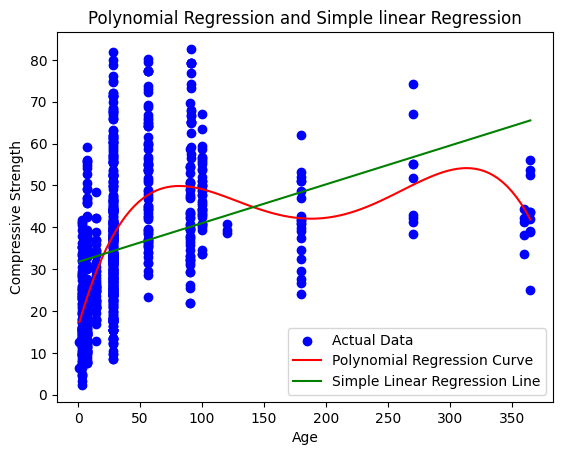

In [10]:
# Define an array of x values within the desired range
x = np.linspace(X_train[['age']].min(),X_train[['age']].max(), 100)

# Compute the corresponding y values using the polynomial equation with the optimized coefficients and intercept
y_poly = PolyModel.intercept_
for i in range(1, len(PolyModel.coef_)):
    y_poly += PolyModel.coef_[i] * np.power(x, i)

# Compute the corresponding y values using the simple linear equation with the optimized coefficients and intercept
y_simple = SimpleModel.intercept_ + SimpleModel.coef_[0] * x

# Plot the original data points
plt.scatter(X_train[['age']], y_train, color='blue', label='Actual Data')

# Plot the regression curve from the polynomial regression
plt.plot(x, y_poly, color='red', label='Polynomial Regression Curve')

# Plot the regression line from the simple linear regression
plt.plot(x, y_simple, color='green', label='Simple Linear Regression Line')

# Set the labels and title of the plot
plt.xlabel("Age")
plt.ylabel("Compressive Strength")
plt.title('Polynomial Regression and Simple linear Regression')

# Show the legend
plt.legend()

# Display the plot
plt.show()

### **Conclusion**

Upon plotting both models, it becomes evident that the polynomial linear regression model performs better in predicting the concrete compressive strength based on age.

The plot illustrates that the polynomial model provides a better fit to the data compared to the simple linear model. It captures the nonlinear relationship between age and compressive strength more accurately, resulting in a curve that closely aligns with the actual data points. In contrast, the simple linear model's predictions tend to deviate more from the observed values, exhibiting a less precise fit.

By considering the plot alongside the evaluation metrics previously mentioned, we can confidently conclude that the polynomial linear regression model is superior in capturing the complexities of the relationship between age and concrete compressive strength. Its ability to model nonlinear patterns enables it to make more accurate predictions, making it the preferred choice over the simple linear regression model for this particular dataset.

## Practice

Let's examine the evaluation metrics obtained when training a polynomial regression model  using ` X_train[['cement' ,'superplasticizer','age']] ` as the traning dataset. Set the degree to be 3:  `PolynomialFeatures(degree=3)`

 -  Does using three features (instead of using 'age' alone) help the accracy of the model?

We trained a **multiple linear regression** model on the same training dataset in the las lab, and these are the results of the evaluation that model:

$$Mean Squared Error (MSE):120.271\\
R-squared (R2) score:0.533$$

 -  Does changing the degree of the model (from 1 in the multiple linear regression to 3 in this model) helps the accuracy of the model?
 -  Can you explain why we have this number of coefficients for the new model.

In [11]:
# Your Code Here

<details><summary>Click here for the answer</summary>

```python    
Polynomial = PolynomialFeatures(degree=3)
X_train_Polynomial3 = Polynomial.fit_transform(X_train[['cement' ,'superplasticizer','age']])
PolyModel3 = LinearRegression()
PolyModel3.fit(X_train_Polynomial3, y_train)
print ('Coefficients: ', PolyModel3.coef_)
print ('Intercept: ',PolyModel3.intercept_)

# Evaluate
X_test_Polynomial3 = Polynomial.fit_transform(X_test[['cement' ,'superplasticizer','age']])
y_pred3 = PolyModel3.predict(X_test_Polynomial3)
mae_3 = np.mean(np.absolute(y_test - y_pred3))
mse_3 = np.mean((y_test - y_pred3) ** 2)
r2_3 = r2_score(y_test, y_pred3)
print('Mean Absolute Error (MAE) of the polynomial linear regression model:', mae_3)
print('Mean Squared Error (MSE) of the polynomial linear regression model:', mse_3)
print('R-squared (R2) score of the polynomial linear regression model:', r2_3)
```

</details>

### Thank you and good luck!